# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы ФИО ГРУППА
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [2]:
import numpy as np

INF = float('inf')

def floyd_warshall(graph):
    V = len(graph)
    dist = np.array(graph, dtype=float)  # Копируем граф
    np.fill_diagonal(dist, 0)  # Нули на главной диагонали

    for k in range(V):
        for i in range(V):
            for j in range(V):
                if dist[i, k] != INF and dist[k, j] != INF:
                    dist[i, j] = min(dist[i, j], dist[i, k] + dist[k, j])

    return dist

# Читаем граф из файла
def read_graph_from_file(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
        V = int(lines[0])  # Число вершин
        graph = []
        for line in lines[1:]:
            graph.append([INF if x == 'INF' else float(x) for x in line.split()])
        return graph

if __name__ == "__main__":
    graph = read_graph_from_file("graph.txt")
    result = floyd_warshall(graph)

    print("Кратчайшие расстояния между вершинами:")
    print(result)


Кратчайшие расстояния между вершинами:
[[0. 3. 5. 6.]
 [5. 0. 2. 3.]
 [3. 6. 0. 1.]
 [2. 5. 7. 0.]]


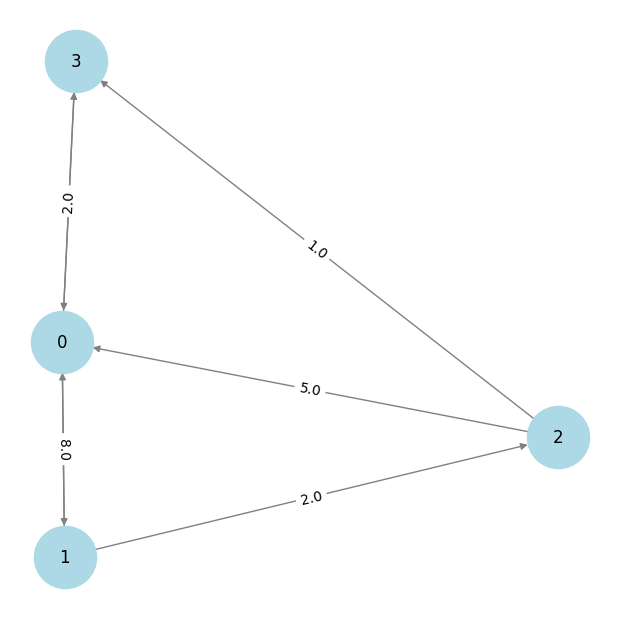

In [6]:
import tkinter as tk
from tkinter import filedialog, messagebox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

INF = float('inf')

# Алгоритм Флойда-Уоршелла
def floyd_warshall(graph):
    V = len(graph)
    dist = np.array(graph, dtype=float)
    np.fill_diagonal(dist, 0)
    for k in range(V):
        for i in range(V):
            for j in range(V):
                if dist[i, k] != INF and dist[k, j] != INF:
                    dist[i, j] = min(dist[i, j], dist[i, k] + dist[k, j])
    return dist

# Чтение графа из файла
def read_graph_from_file():
    filename = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
    if not filename:
        return
    
    with open(filename, 'r') as f:
        lines = f.readlines()
        V = int(lines[0])
        graph = []
        for line in lines[1:]:
            graph.append([INF if x == 'INF' else float(x) for x in line.split()])
    
    return graph, V

# Визуализация графа
def draw_graph(graph):
    G = nx.DiGraph()
    V = len(graph)
    
    for i in range(V):
        for j in range(V):
            if graph[i][j] != INF and i != j:
                G.add_edge(i, j, weight=graph[i][j])
    
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(6,6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

# Основное окно
def main():
    root = tk.Tk()
    root.title("Поиск кратчайшего пути (Флойд-Уоршелл)")
    
    graph, V = read_graph_from_file()
    if not graph:
        messagebox.showerror("Ошибка", "Не удалось загрузить граф")
        return

    draw_graph(graph)
    distances = floyd_warshall(graph)

    # Ввод вершин
    tk.Label(root, text="От:").grid(row=0, column=0)
    entry_from = tk.Entry(root)
    entry_from.grid(row=0, column=1)

    tk.Label(root, text="До:").grid(row=1, column=0)
    entry_to = tk.Entry(root)
    entry_to.grid(row=1, column=1)

    # Функция вычисления пути
    def find_shortest_path():
        try:
            start = int(entry_from.get())
            end = int(entry_to.get())
            if 0 <= start < V and 0 <= end < V:
                distance = distances[start][end]
                messagebox.showinfo("Результат", f"Кратчайшее расстояние: {distance}")
            else:
                messagebox.showerror("Ошибка", "Неверные номера вершин")
        except ValueError:
            messagebox.showerror("Ошибка", "Введите корректные номера вершин")

    # Кнопка
    btn = tk.Button(root, text="Найти путь", command=find_shortest_path)
    btn.grid(row=2, columnspan=2)

    root.mainloop()

# Запуск программы
if __name__ == "__main__":
    main()


In [5]:
import time
import numpy as np

INF = float('inf')

def floyd_warshall(graph):
    V = len(graph)
    dist = np.array(graph, dtype=float)
    np.fill_diagonal(dist, 0)
    
    for k in range(V):
        for i in range(V):
            for j in range(V):
                if dist[i, k] != INF and dist[k, j] != INF:
                    dist[i, j] = min(dist[i, j], dist[i, k] + dist[k, j])
    
    return dist

# Генерация случайного графа
def generate_graph(V):
    np.random.seed(0)
    graph = np.random.randint(1, 10, size=(V, V)).astype(float)
    graph[graph > 7] = INF  # 30% рёбер отсутствуют
    np.fill_diagonal(graph, 0)  # Нули на диагонали
    return graph

# Измерение времени
for V in [5, 10, 20, 50, 100]:
    graph = generate_graph(V)
    start_time = time.time()
    floyd_warshall(graph)
    elapsed_time = time.time() - start_time
    print(f"Вершины: {V}, Время выполнения: {elapsed_time:.6f} сек")


Вершины: 5, Время выполнения: 0.000098 сек
Вершины: 10, Время выполнения: 0.000898 сек
Вершины: 20, Время выполнения: 0.008904 сек
Вершины: 50, Время выполнения: 0.159930 сек
Вершины: 100, Время выполнения: 1.010898 сек


In [ ]:
import heapq

INF = float('inf')

def dijkstra(graph, start):
    V = len(graph)
    distances = [INF] * V  # Начально все расстояния бесконечны
    distances[start] = 0  # Расстояние до стартовой вершины = 0
    pq = [(0, start)]  # Очередь (расстояние, вершина)
    
    while pq:
        current_dist, current_vertex = heapq.heappop(pq)

        if current_dist > distances[current_vertex]:
            continue

        for neighbor, weight in enumerate(graph[current_vertex]):
            if weight != INF:  # Если есть ребро
                distance = current_dist + weight

                if distance < distances[neighbor]:  # Улучшаем расстояние
                    distances[neighbor] = distance
                    heapq.heappush(pq, (distance, neighbor))

    return distances


In [8]:
def read_graph_from_file(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
        V = int(lines[0])
        graph = []
        for line in lines[1:]:
            graph.append([INF if x == 'INF' else float(x) for x in line.split()])
        return graph, V


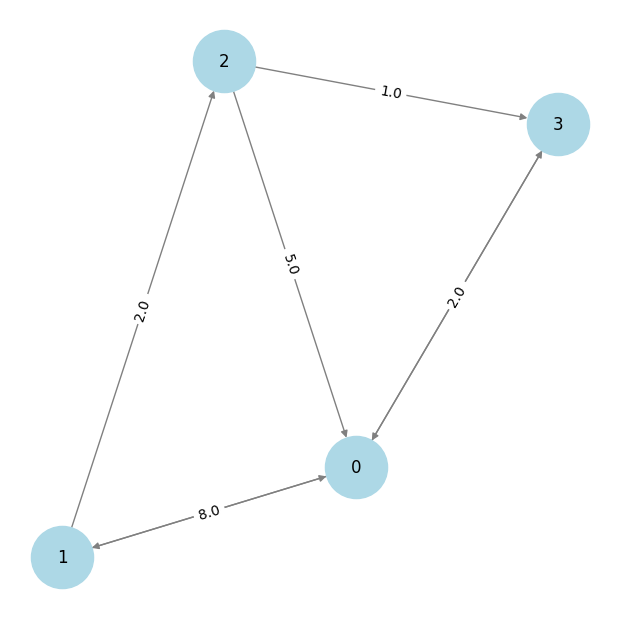

In [24]:
import tkinter as tk
from tkinter import filedialog, messagebox
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import numpy as np

INF = float('inf')

# Функция Дейкстры
def dijkstra(graph, start):
    V = len(graph)
    distances = [INF] * V
    distances[start] = 0
    pq = [(0, start)]

    while pq:
        current_dist, current_vertex = heapq.heappop(pq)

        if current_dist > distances[current_vertex]:
            continue

        for neighbor, weight in enumerate(graph[current_vertex]):
            if weight != INF:
                distance = current_dist + weight
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    heapq.heappush(pq, (distance, neighbor))

    return distances

# Чтение графа
def read_graph_from_file():
    filename = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
    if not filename:
        return None, None

    with open(filename, 'r') as f:
        lines = f.readlines()
        V = int(lines[0])
        graph = []
        for line in lines[1:]:
            graph.append([INF if x == 'INF' else float(x) for x in line.split()])

    return graph, V

# Визуализация графа
def draw_graph(graph):
    G = nx.DiGraph()
    V = len(graph)

    for i in range(V):
        for j in range(V):
            if graph[i][j] != INF and i != j:
                G.add_edge(i, j, weight=graph[i][j])

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

# Основное окно GUI
def main():
    root = tk.Tk()
    root.title("Алгоритм Дейкстры")

    graph, V = read_graph_from_file()
    if graph is None:
        messagebox.showerror("Ошибка", "Не удалось загрузить граф")
        return

    draw_graph(graph)
    
    tk.Label(root, text="Стартовая вершина:").grid(row=0, column=0)
    entry_start = tk.Entry(root)
    entry_start.grid(row=0, column=1)

    def find_shortest_paths():
        try:
            start = int(entry_start.get())
            if 0 <= start < V:
                distances = dijkstra(graph, start)
                result_text = "\n".join(f"{i}: {d}" for i, d in enumerate(distances))
                messagebox.showinfo("Результат", f"Кратчайшие расстояния:\n{result_text}")
            else:
                messagebox.showerror("Ошибка", "Неверный номер вершины")
        except ValueError:
            messagebox.showerror("Ошибка", "Введите корректное число")

    btn = tk.Button(root, text="Вычислить", command=find_shortest_paths)
    btn.grid(row=1, columnspan=2)

    root.mainloop()

# Запуск GUI
if __name__ == "__main__":
    main()

In [11]:
import time
import numpy as np
import heapq

INF = float('inf')

# Функция Дейкстры
def dijkstra(graph, start):
    V = len(graph)
    distances = [INF] * V
    distances[start] = 0
    pq = [(0, start)]

    while pq:
        current_dist, current_vertex = heapq.heappop(pq)

        if current_dist > distances[current_vertex]:
            continue

        for neighbor, weight in enumerate(graph[current_vertex]):
            if weight != INF:
                distance = current_dist + weight
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    heapq.heappush(pq, (distance, neighbor))

    return distances

# Генерация случайного графа
def generate_graph(V):
    np.random.seed(0)
    graph = np.random.randint(1, 10, size=(V, V)).astype(float)
    graph[graph > 7] = INF  # 30% рёбер отсутствуют
    np.fill_diagonal(graph, 0)
    return graph

# Измерение времени
for V in [5, 10, 20, 50, 100, 200]:
    graph = generate_graph(V)
    start_time = time.time()
    dijkstra(graph, 0)
    elapsed_time = time.time() - start_time
    print(f"Вершины: {V}, Время выполнения: {elapsed_time:.6f} сек")


Вершины: 5, Время выполнения: 0.000031 сек
Вершины: 10, Время выполнения: 0.000045 сек
Вершины: 20, Время выполнения: 0.000102 сек
Вершины: 50, Время выполнения: 0.000452 сек
Вершины: 100, Время выполнения: 0.001600 сек
Вершины: 200, Время выполнения: 0.006968 сек


In [12]:
def bellman_ford(graph, V, start):
    INF = float('inf')
    distances = [INF] * V
    distances[start] = 0

    # Расслабляем рёбра (V-1) раз
    for _ in range(V - 1):
        for u in range(V):
            for v in range(V):
                if graph[u][v] != INF and distances[u] != INF:
                    distances[v] = min(distances[v], distances[u] + graph[u][v])

    # Проверяем на наличие отрицательных циклов
    for u in range(V):
        for v in range(V):
            if graph[u][v] != INF and distances[u] != INF and distances[u] + graph[u][v] < distances[v]:
                return None  # Обнаружен отрицательный цикл

    return distances

In [14]:
def read_graph_from_file(filename):
    INF = float('inf')
    with open(filename, 'r') as f:
        lines = f.readlines()
        V = int(lines[0])
        graph = []
        for line in lines[1:]:
            graph.append([INF if x == 'INF' else float(x) for x in line.split()])
    return graph, V


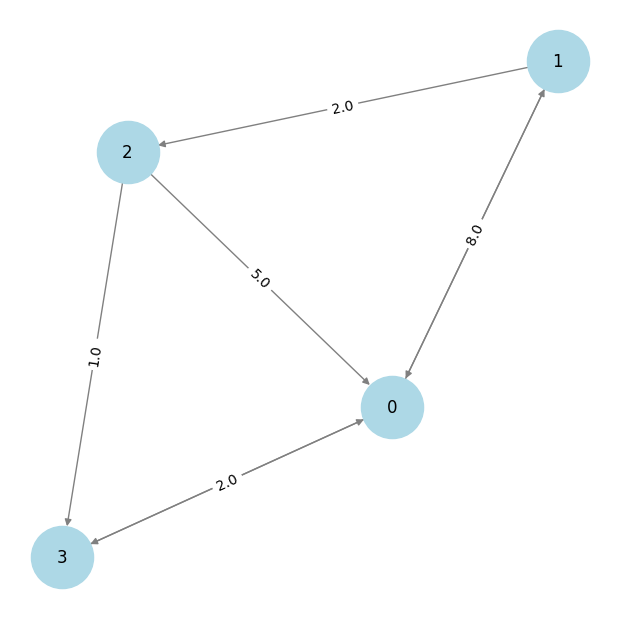

In [15]:
import tkinter as tk
from tkinter import filedialog, messagebox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

INF = float('inf')

# Функция Беллмана-Форда
def bellman_ford(graph, V, start):
    distances = [INF] * V
    distances[start] = 0

    for _ in range(V - 1):
        for u in range(V):
            for v in range(V):
                if graph[u][v] != INF and distances[u] != INF:
                    distances[v] = min(distances[v], distances[u] + graph[u][v])

    for u in range(V):
        for v in range(V):
            if graph[u][v] != INF and distances[u] != INF and distances[u] + graph[u][v] < distances[v]:
                return None  # Обнаружен отрицательный цикл

    return distances

# Читаем граф
def read_graph_from_file():
    filename = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
    if not filename:
        return None, None

    with open(filename, 'r') as f:
        lines = f.readlines()
        V = int(lines[0])
        graph = []
        for line in lines[1:]:
            graph.append([INF if x == 'INF' else float(x) for x in line.split()])
    
    return graph, V

# Визуализация графа
def draw_graph(graph):
    G = nx.DiGraph()
    V = len(graph)

    for i in range(V):
        for j in range(V):
            if graph[i][j] != INF and i != j:
                G.add_edge(i, j, weight=graph[i][j])

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(6,6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

# GUI
def main():
    root = tk.Tk()
    root.title("Алгоритм Беллмана-Форда")

    graph, V = read_graph_from_file()
    if graph is None:
        messagebox.showerror("Ошибка", "Не удалось загрузить граф")
        return

    draw_graph(graph)

    tk.Label(root, text="Стартовая вершина:").grid(row=0, column=0)
    entry_start = tk.Entry(root)
    entry_start.grid(row=0, column=1)

    def find_shortest_paths():
        try:
            start = int(entry_start.get())
            if 0 <= start < V:
                distances = bellman_ford(graph, V, start)
                if distances is None:
                    messagebox.showerror("Ошибка", "Обнаружен отрицательный цикл!")
                else:
                    result_text = "\n".join(f"{i}: {d}" for i, d in enumerate(distances))
                    messagebox.showinfo("Результат", f"Кратчайшие расстояния:\n{result_text}")
            else:
                messagebox.showerror("Ошибка", "Неверный номер вершины")
        except ValueError:
            messagebox.showerror("Ошибка", "Введите корректное число")

    btn = tk.Button(root, text="Вычислить", command=find_shortest_paths)
    btn.grid(row=1, columnspan=2)

    root.mainloop()

# Запуск GUI
if __name__ == "__main__":
    main()

In [16]:
import time
import numpy as np

INF = float('inf')

# Беллман-Форд
def bellman_ford(graph, V, start):
    distances = [INF] * V
    distances[start] = 0

    for _ in range(V - 1):
        for u in range(V):
            for v in range(V):
                if graph[u][v] != INF and distances[u] != INF:
                    distances[v] = min(distances[v], distances[u] + graph[u][v])

    for u in range(V):
        for v in range(V):
            if graph[u][v] != INF and distances[u] != INF and distances[u] + graph[u][v] < distances[v]:
                return None

    return distances

# Генерация случайного графа
def generate_graph(V):
    np.random.seed(0)
    graph = np.random.randint(-5, 10, size=(V, V)).astype(float)
    graph[graph > 7] = INF  # 30% рёбер отсутствуют
    np.fill_diagonal(graph, 0)
    return graph

# Измерение времени
for V in [5, 10, 20, 50, 100]:
    graph = generate_graph(V)
    start_time = time.time()
    bellman_ford(graph, V, 0)
    elapsed_time = time.time() - start_time
    print(f"Вершины: {V}, Время выполнения: {elapsed_time:.6f} сек")


Вершины: 5, Время выполнения: 0.000150 сек
Вершины: 10, Время выполнения: 0.001056 сек
Вершины: 20, Время выполнения: 0.009789 сек
Вершины: 50, Время выполнения: 0.105778 сек
Вершины: 100, Время выполнения: 0.674537 сек


In [ ]:
import heapq O(V + E) O(V^2)

INF = float('inf')

def bellman_ford(graph, V, start):
    distances = [INF] * V
    distances[start] = 0

    for _ in range(V - 1):
        for u in range(V):
            for v in range(V):
                if graph[u][v] != INF and distances[u] != INF:
                    if distances[u] + graph[u][v] < distances[v]:
                        distances[v] = distances[u] + graph[u][v]

    for u in range(V):
        for v in range(V):
            if graph[u][v] != INF and distances[u] + graph[u][v] < distances[v]:
                return None  # Обнаружен отрицательный цикл

    return distances

def dijkstra(graph, start):
    V = len(graph)
    distances = [INF] * V
    distances[start] = 0
    pq = [(0, start)]

    while pq:
        current_dist, u = heapq.heappop(pq)

        for v, weight in enumerate(graph[u]):
            if weight != INF:
                new_dist = current_dist + weight
                if new_dist < distances[v]:
                    distances[v] = new_dist
                    heapq.heappush(pq, (new_dist, v))

    return distances

def johnson(graph):
    V = len(graph)

    # Правильно расширяем матрицу
    extended_graph = [row + [0] for row in graph]
    extended_graph.append([0] * (V + 1))

    h = bellman_ford(extended_graph, V + 1, V)
    if h is None:
        return None  # отрицательный цикл

    reweighted = [[INF] * V for _ in range(V)]
    for u in range(V):
        for v in range(V):
            if graph[u][v] != INF:
                reweighted[u][v] = graph[u][v] + h[u] - h[v]

    all_pairs = []
    for u in range(V):
        d = dijkstra(reweighted, u)
        corrected = [d[v] + h[v] - h[u] if d[v] != INF else INF for v in range(V)]
        all_pairs.append(corrected)

    return all_pairs

In [20]:
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
import networkx as nx
from johnson_algorithm import johnson, INF

def read_graph_from_file(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
        graph = []
        for line in lines:
            row = [float(x) if x != 'INF' else INF for x in line.strip().split()]
            graph.append(row)
    return graph

def visualize_graph(graph, path_matrix, start, end):
    G = nx.DiGraph()
    for i in range(len(graph)):
        for j in range(len(graph)):
            if graph[i][j] != INF:
                G.add_edge(i, j, weight=graph[i][j])

    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path_matrix and path_matrix[start][end] != INF:
        path_edges = [(start, end)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title("Визуализация графа (Johnson)")
    plt.show()

def main():
    graph = read_graph_from_file("johnson_graph.txt")

    def on_run():
        try:
            start = int(entry_start.get())
            end = int(entry_end.get())
            if start < 0 or end >= len(graph):
                raise ValueError

            result = johnson(graph)
            if result is None:
                messagebox.showerror("Ошибка", "Обнаружен отрицательный цикл.")
                return

            distance = result[start][end]
            if distance == INF:
                messagebox.showinfo("Результат", f"Нет пути от {start} до {end}")
            else:
                messagebox.showinfo("Результат", f"Кратчайшее расстояние от {start} до {end}: {distance}")
                visualize_graph(graph, result, start, end)
        except:
            messagebox.showerror("Ошибка", "Некорректный ввод")

    root = tk.Tk()
    root.title("Алгоритм Джонсона")

    tk.Label(root, text="Начальная вершина:").pack()
    entry_start = tk.Entry(root)
    entry_start.pack()

    tk.Label(root, text="Конечная вершина:").pack()
    entry_end = tk.Entry(root)
    entry_end.pack()

    tk.Button(root, text="Вычислить", command=on_run).pack()

    root.mainloop()

if __name__ == "__main__":
    main()

In [19]:
import time
import numpy as np
from johnson_algorithm import johnson, INF

def generate_graph(V):
    np.random.seed(0)
    graph = np.random.randint(-3, 10, size=(V, V)).astype(float)
    graph[graph > 7] = INF
    np.fill_diagonal(graph, 0)
    return graph

def analyze_time():
    print("\nАнализ времени выполнения (Johnson):")
    for V in [5, 10, 20, 30]:
        graph = generate_graph(V)
        start = time.time()
        result = johnson(graph)
        elapsed = time.time() - start
        print(f"Вершины: {V}, Время выполнения: {elapsed:.6f} сек")

if __name__ == "__main__":
    analyze_time()


Анализ времени выполнения (Johnson):


IndexError: index 5 is out of bounds for axis 0 with size 5

In [1]:
from collections import deque

INF = float('inf')

def levit(graph, start, end):
    V = len(graph)
    M0, M1, M2 = set(), set(range(V)), set()
    distance = [INF] * V
    prev = [None] * V
    queue = deque()

    distance[start] = 0
    queue.append(start)
    M1.remove(start)
    M0.add(start)

    while queue:
        u = queue.popleft()
        for v in range(V):
            if graph[u][v] == INF or u == v:
                continue

            new_dist = distance[u] + graph[u][v]
            if v in M2:
                if new_dist < distance[v]:
                    distance[v] = new_dist
                    prev[v] = u
                    M2.remove(v)
                    queue.appendleft(v)
                    M0.add(v)
            elif v in M1:
                distance[v] = new_dist
                prev[v] = u
                queue.append(v)
                M1.remove(v)
                M0.add(v)
            elif v in M0 and new_dist < distance[v]:
                distance[v] = new_dist
                prev[v] = u

        M0.remove(u)
        M2.add(u)

    path = []
    current = end
    while current is not None:
        path.append(current)
        current = prev[current]
    path.reverse()

    return distance[end], path

In [2]:
def read_graph_from_file(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    graph = []
    for line in lines:
        row = [float(x) if x != 'INF' else INF for x in line.strip().split()]
        graph.append(row)
    return graph

graph = read_graph_from_file("levit_graph.txt")
start, end = 0, 4
dist, path = levit(graph, start, end)
print(f"Расстояние от {start} до {end}: {dist}")
print("Путь:", ' → '.join(map(str, path)))

Расстояние от 0 до 4: 2.0
Путь: 0 → 4


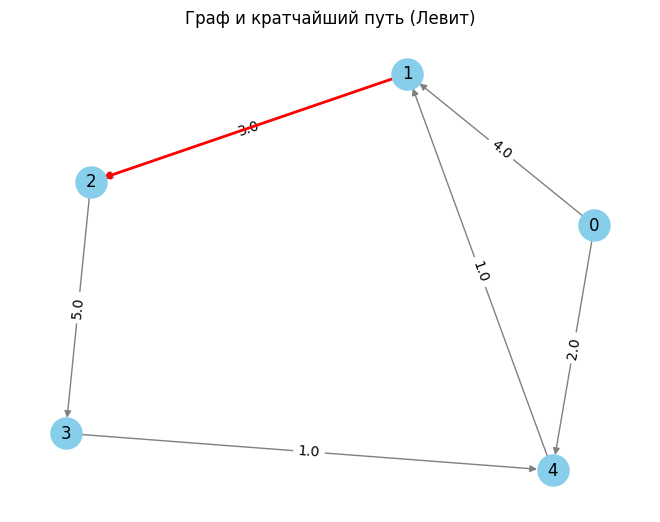

In [3]:
import tkinter as tk
from tkinter import filedialog, messagebox
import matplotlib.pyplot as plt
import networkx as nx

def visualize_graph(graph, path):
    G = nx.DiGraph()
    for i in range(len(graph)):
        for j in range(len(graph[i])):
            if graph[i][j] != INF and i != j:
                G.add_edge(i, j, weight=graph[i][j])

    pos = nx.spring_layout(G)
    edge_labels = {(i, j): graph[i][j] for i, j in G.edges()}
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path and len(path) > 1:
        nx.draw_networkx_edges(G, pos, edgelist=list(zip(path, path[1:])), edge_color='red', width=2)

    plt.title("Граф и кратчайший путь (Левит)")
    plt.show()

def main():
    def load_file():
        nonlocal graph, V
        filename = filedialog.askopenfilename()
        graph = read_graph_from_file(filename)
        if graph:
            V = len(graph)
            messagebox.showinfo("Граф загружен", "Граф успешно загружен!")

    def find_path():
        try:
            start = int(entry_start.get())
            end = int(entry_end.get())
            if start >= V or end >= V or start < 0 or end < 0:
                raise ValueError("Некорректные номера вершин")
            dist, path = levit(graph, start, end)
            result_text.set(f"Кратчайшее расстояние: {dist}\nПуть: {' → '.join(map(str, path))}")
            visualize_graph(graph, path)
        except Exception as e:
            messagebox.showerror("Ошибка", str(e))

    root = tk.Tk()
    root.title("Алгоритм Левита")

    graph = []
    V = 0

    tk.Button(root, text="Загрузить граф из файла", command=load_file).pack()
    tk.Label(root, text="Начальная вершина:").pack()
    entry_start = tk.Entry(root)
    entry_start.pack()
    tk.Label(root, text="Конечная вершина:").pack()
    entry_end = tk.Entry(root)
    entry_end.pack()
    tk.Button(root, text="Найти кратчайший путь", command=find_path).pack()
    result_text = tk.StringVar()
    tk.Label(root, textvariable=result_text).pack()

    root.mainloop()

main()

In [9]:
import time
import numpy as np

def generate_graph(V):
    np.random.seed(0)
    graph = np.random.randint(1, 10, size=(V, V)).astype(float)
    graph[graph > 7] = INF
    np.fill_diagonal(graph, 0)
    return graph

def analyze_time():
    print("\nАнализ времени выполнения алгоритма Левита:")
    print(f"{'Вершины':<10} {'Рёбра':<10} {'Время (сек)':<15}")
    print("-" * 35)
    for V in [5, 10, 20, 50]:
        graph = generate_graph(V)
        edges = sum(1 for i in range(V) for j in range(V) if graph[i][j] != INF and i != j)
        start_time = time.time()
        levit(graph, 0, V - 1)
        elapsed_time = time.time() - start_time
        print(f"{V:<10} {edges:<10} {elapsed_time:<15.63f}")

analyze_time()


Анализ времени выполнения алгоритма Левита:
Вершины    Рёбра      Время (сек)    
-----------------------------------
5          13         0.000029802322387695312500000000000000000000000000000000000000000
10         71         0.000064849853515625000000000000000000000000000000000000000000000
20         290        0.000304222106933593750000000000000000000000000000000000000000000
50         1917       0.002202510833740234375000000000000000000000000000000000000000000


In [ ]:
import heapq

INF = float('inf')

def dijkstra(graph, start, end):
    V = len(graph)
    distances = [INF] * V
    previous = [None] * V
    distances[start] = 0
    queue = [(0, start)]

    while queue:
        dist_u, u = heapq.heappop(queue)

        if u == end:
            break

        for v, weight in enumerate(graph[u]):
            if weight != INF:
                alt = dist_u + weight
                if alt < distances[v]:
                    distances[v] = alt
                    previous[v] = u
                    heapq.heappush(queue, (alt, v))

    path = []
    current = end
    if distances[end] == INF:
        return INF, []

    while current is not None:
        path.append(current)
        current = previous[current]
    return distances[end], path[::-1]

def yen_k_shortest_paths(graph, start, end, K):
    distance, path = dijkstra(graph, start, end)
    if distance == INF:
        return []

    paths = [(distance, path)]
    potential_paths = []

    for k in range(1, K):
        for i in range(len(paths[-1][1]) - 1):
            spur_node = paths[-1][1][i]
            root_path = paths[-1][1][:i + 1]

            temp_graph = [row[:] for row in graph]

            for cost, p in paths:
                if p[:i + 1] == root_path and len(p) > i + 1:
                    u, v = p[i], p[i + 1]
                    temp_graph[u][v] = INF

            for node in root_path[:-1]:
                temp_graph[node] = [INF] * len(graph)

            spur_dist, spur_path = dijkstra(temp_graph, spur_node, end)
            if spur_dist != INF:
                total_path = root_path[:-1] + spur_path
                total_dist = sum(graph[total_path[i]][total_path[i + 1]] for i in range(len(total_path) - 1))
                if (total_dist, total_path) not in potential_paths:
                    heapq.heappush(potential_paths, (total_dist, total_path))

        if not potential_paths:
            break

        paths.append(heapq.heappop(potential_paths))

    return paths


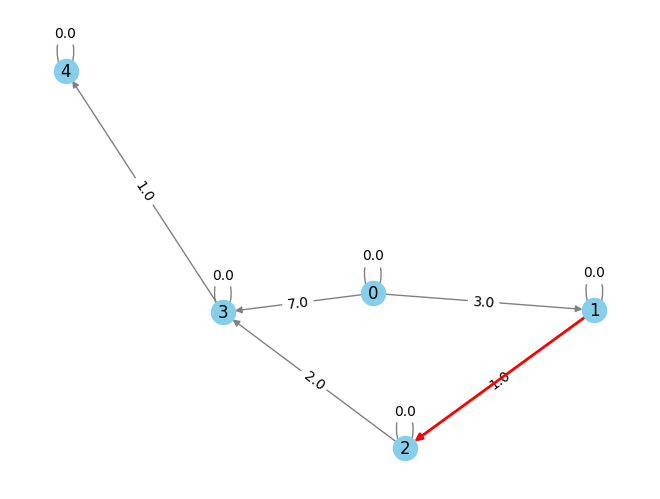

In [11]:
import tkinter as tk
from tkinter import filedialog, messagebox
import networkx as nx
import matplotlib.pyplot as plt
from yen_algorithm import yen_k_shortest_paths, INF

def read_graph_from_file(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
        graph = []
        for line in lines:
            row = [float(x) if x != 'INF' else INF for x in line.strip().split()]
            graph.append(row)
    return graph

def visualize_graph(graph, paths=None):
    G = nx.DiGraph()
    for i in range(len(graph)):
        for j in range(len(graph)):
            if graph[i][j] != INF:
                G.add_edge(i, j, weight=graph[i][j])

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)})

    if paths:
        for path in paths:
            edges = list(zip(path[1][:-1], path[1][1:]))
            nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='red', width=2)

    plt.show()

def main():
    graph = read_graph_from_file("yen_graph.txt")

    def on_calculate():
        try:
            start = int(entry_start.get())
            end = int(entry_end.get())
            k = int(entry_k.get())
            if start < 0 or end >= len(graph) or k <= 0:
                raise ValueError
            paths = yen_k_shortest_paths(graph, start, end, k)
            if not paths:
                messagebox.showinfo("Результат", "Пути не найдены.")
            else:
                result_text = "\n".join([f"{i + 1}) Длина: {p[0]}, Путь: {p[1]}" for i, p in enumerate(paths)])
                messagebox.showinfo("Результат", result_text)
                visualize_graph(graph, paths)
        except:
            messagebox.showerror("Ошибка", "Неверный ввод или невозможный путь.")

    root = tk.Tk()
    root.title("Алгоритм Йена")
    tk.Label(root, text="Стартовая вершина:").pack()
    entry_start = tk.Entry(root)
    entry_start.pack()
    tk.Label(root, text="Конечная вершина:").pack()
    entry_end = tk.Entry(root)
    entry_end.pack()
    tk.Label(root, text="Количество путей (K):").pack()
    entry_k = tk.Entry(root)
    entry_k.pack()
    tk.Button(root, text="Вычислить", command=on_calculate).pack()
    root.mainloop()

if __name__ == "__main__":
    main()

In [12]:
import time
import numpy as np
from yen_algorithm import yen_k_shortest_paths, INF

def generate_graph(V):
    np.random.seed(0)
    graph = np.random.randint(1, 10, size=(V, V)).astype(float)
    graph[graph > 7] = INF
    np.fill_diagonal(graph, 0)
    return graph

def analyze_time():
    print("\nАнализ времени выполнения алгоритма Йена:")
    for V in [5, 10, 15]:
        graph = generate_graph(V)
        start_time = time.time()
        paths = yen_k_shortest_paths(graph, 0, V - 1, 3)
        elapsed_time = time.time() - start_time
        print(f"Вершины: {V}, Время выполнения: {elapsed_time:.6f} сек, Найдено путей: {len(paths)}")

if __name__ == "__main__":
    analyze_time()


Анализ времени выполнения алгоритма Йена:
Вершины: 5, Время выполнения: 0.000103 сек, Найдено путей: 3
Вершины: 10, Время выполнения: 0.000265 сек, Найдено путей: 3
Вершины: 15, Время выполнения: 0.000423 сек, Найдено путей: 3
